### Background

Applications that require heterogeneous sensor deployments such as wildlife tracking, bridge activity monitoring and military surveillance systems continue to face challenges related to energy efficiency and accurate event classification, prediction and detection. Given computational constraints at sensor nodes, there is need for effective ways of selecting a sensing strategy that maximizes detection accuracy for user-defined events using available resources and data-driven approaches. I propose a scalable approach for distributed sensors which can achieve optimal sampling rates for a cluster of sensors at runtime as determined by a novel learning approach that is data driven. 

In a quest to achieve my goal, I will first investigate regression methods on 'sensor-like' data. This report will detail the following;

1. Project Objectives 
2. Definitions 
3. Data Generation
4. Datasets
    - Loading data
    - Splitting data
5. Packages 
6. Regression methods
    - Simple Linear Regression (LR) 
    - Gaussian Process Regression (GPR)
    - KerasNN (KR) 
7. Results
8. Analysis
9. More on GPR: Effects of input space meshing and kernel parameter values
10. More on GPR: Comparison of kernel methods 
11. More on GPR: Hyperparameter optimization
12. Extrapolation: LR, GPR, kerasNN. 



### Project Objectives 
________

The main aims of this project will be to perform regression on fairly sized datasets with the aim of discovering and learning the underlying processes from 'noisy' and 'perfect' observed data. I will perform linear regression (LR), multiple linear regression (MLR) and multivariate linear regression (MuLR) on 'sensor-like' datasets that I will describe in sections to follow. In the scope of this project, I will assess regression perfomance based on; time taken to perform regression, mean standard error (MSE), variance, point of convergence, optimization techniques. I will use standard machine learning, scientific computing and statistical packages which I will detail in sections to follow as well. 


### Definitions
_____

#### LR: 
Simple linear regression using one input feature. LR attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.


#### kerasNN: 
Regression with a Keras model being evaluated with scikit-learn by using handy wrapper objects availed by the Keras library. The defined model has a single fully connected hidden layer with two neurons. The model also uses the rectifier activation function for the hidden layer and Adam optimization for the mean-squared error loss function.


#### GPR:
Regression with noise level estimation and gradient based optimization. GPR learns a probabilistic model of the target function which is generative in nature thereby providing meaningful confidence intervals and posterior samples along with the predictions. 


#### MLR: 
Approach that models the relationship between a scalar dependent variable y and more than one explanatory variables (or independent variables) denoted X. 


#### MuLR:
Approach where multiple correlated dependent variables are predicted, rather than a single scalar variable.


#### 'sensor-like': 
real-valued data. 


#### mean standard error (MSE): 
The ordinary least squares estimate of the standard deviation of the underlying errors.


#### variance:
The average of the squared differences from the mean. 


### Data Generation
___

For this project, I generate my own data using a python script. Below is the script I use for my data generation. The script produces 8 datasets described below ranging from 1,000 to 100,000 samples and data being mapped by linear functions. 

In [1]:
#author: Prince M. Abudu
#Date: 16 February 2017
#Revised: 03 March 2017 

from __future__ import print_function
import random;
import numpy as np

#defining the column header
Column_Names = "Acceleration","Velocity";
Column_Names_1 = "Acceleration", "GPS", "Velocity";

#function to generate new data
def one_two_noisy_perfect_x():
    for x in range(0,1):
        noise = np.random.normal(0,5)
        acc_data = random.uniform(0,100)
        gps_data = random.uniform(20,60)
        one_velocity_perfect = ((acc_data * 0.28) + 3.2)
        one_velocity_noisy = ((acc_data * 0.28) + 3.2) + noise
        two_velocity_perfect = ((acc_data + (2*gps_data))/12.8)
        two_velocity_noisy = ((acc_data + (2*gps_data))/12.8) + noise
        test_gpr_velocity = acc_data * np.sin(acc_data)	      

        return round(acc_data,2), round(one_velocity_noisy,1), round(one_velocity_perfect,1), round(gps_data,2), round(two_velocity_perfect,1), round(two_velocity_noisy,1), round(test_gpr_velocity,1);

#writing data to files and saving in folder msd_code/record_data
result_log_1 = open("msd_datasets/one_noisy_small.csv",'w')    
print (Column_Names, result_log_1);

result_log_2 = open("msd_datasets/one_perfect_small.csv",'w')
print (Column_Names, result_log_2);

result_log_3 = open("msd_datasets/one_noisy_large.csv",'w')
print (Column_Names, result_log_3);

result_log_4 = open("msd_datasets/one_perfect_large.csv",'w')
print (Column_Names, result_log_4);

result_log_5 = open("msd_datasets/two_noisy_small.csv",'w')
print (Column_Names_1, result_log_5);

result_log_6 = open("msd_datasets/two_perfect_small.csv",'w')
print (Column_Names_1, result_log_6);

result_log_7 = open("msd_datasets/two_noisy_large.csv",'w')
print (Column_Names_1, result_log_7);

result_log_8 = open("msd_datasets/two_perfect_large.csv",'w')
print (Column_Names_1, result_log_8);

result_log_9 = open("msd_datasets/test_gpr_20.csv",'w')
print (Column_Names_1, result_log_9);

result_log_10 = open("msd_datasets/test_gpr_100.csv",'w')
print (Column_Names_1, result_log_10);


#looping to generate datasets of sample size 1,000
for count in range(1,1001):
    a = one_two_noisy_perfect_x()
    rows_1 =  str(a[0])+","+str(a[1])
    rows_2 = str(a[0])+","+str(a[2])
    rows_5 =  str(a[0])+","+str(a[3])+","+str(a[5])
    rows_6 = str(a[0])+","+str(a[3])+","+str(a[4])
    print(rows_1,file=result_log_1)
    print(rows_2,file=result_log_2)
    print(rows_5,file=result_log_5)
    print(rows_6,file=result_log_6)

#looping to generate datasets of sample size 100,000
for count in range(1,100001):
    b = one_two_noisy_perfect_x()
    rows_3 = str(b[0])+","+str(b[1])
    rows_4 = str(b[0])+","+str(b[2])
    rows_7 =  str(b[0])+","+str(b[3])+","+str(b[5])
    rows_8 = str(b[0])+","+str(b[3])+","+str(b[4])
    print(rows_3,file=result_log_3)
    print(rows_4,file=result_log_4)
    print(rows_7,file=result_log_7)
    print(rows_8,file=result_log_8)	
      
#looping to generate datasets of sample size 20
for count in range(1,20):
        c = one_two_noisy_perfect_x();
        rows_9 =  str(c[0])+","+str(c[1]);
        print(rows_9,file=result_log_9);

#looping to generate datasets of sample size 100
for count in range(1,50):
        d = one_two_noisy_perfect_x();
        rows_10 =  str(d[0])+","+str(d[1]);
        print(rows_10,file=result_log_10);

#closing files 
result_log_1.close()
result_log_2.close()
result_log_3.close()
result_log_4.close()
result_log_5.close()
result_log_6.close()
result_log_7.close()
result_log_8.close()
result_log_9.close()
result_log_10.close()





IOError: [Errno 2] No such file or directory: 'msd_datasets/one_noisy_small.csv'

### Datasets
____

In this project, I use the datasets described below and perform regression on them using the methods described in the sections to follow. The datasets are all in csv format and follow the naming convention, [number-of-input-features]_[characteristics-of-data]_[dataset-size]. In addtion to the 8 datasets provided, I also create two unique sets of data for my gaussian process regression as GPR would run our of memory if I use 1,000 or 100,000 datasets. 

___

#### One input feature (1,000 samples)                
____

##### - (1) one_noisy_small    
   - This dataset has two columns; acc_data and one_velocity_noisy. An undelying linear function ((x*0.28) + 3.2) maps acc_data (x) to one_velocity_noisy (y). Some noise is added to the velocity. 

##### - (2) one_perfect_small  
   - This dataset is almost similar to (1) above, the only variation is the noise which I have added to the one_velocity_noisy (y) in (1). 

______
#### One input feature (100,000 samples)
___

##### - (3) one_noisy_large  
  - This dataset is the similar to (1) in that acc_data (x) is mapped to one_velocity_noisy using the same function. Nonetheless, the samples are different. (3) has more samples. 
##### - (4) one_perfect_large  
  - This dataset is the similar to (3) except that the one_velocity_perfect (y) attributes have no noise in them.  


___

#### Two input features (1,000 samples)                
____

##### - (5) two_noisy_small
  - This dataset has three columns; acc_data, gps_data and two_velocity_noisy. An undelying linear function ((a + (2*b)/12.8) maps acc_data (a) and gps_data (b) to two_velocity_noisy (y). Some noise is added to two_velocity_noisy. 

##### - (6) two_perfect_small
  - This dataset is almost similar to (5) above, the only variation is the noise which I have added to the two_velocity_noisy (y) in (5). 

______
#### Two input features (100,000 samples)
___

##### - (7) two_noisy_large
  - This dataset is the similar to (5) in that acc_data and gps_data is mapped to two_velocity_noisy usng the same function. Nonetheless, the samples are different.

##### - (8) two_perfect_large  
  - This dataset is the similar to (7) except that the two_velocity_perfect (y) attributes have noise in them. 

______
#### GPR data
___

##### - (9) test_gpr_20
  - This dataset has two columns; acc_data and test_gpr_velocity. An undelying linear function ((x* sin(x)) maps acc_data (x) to test_gpr_velocity (y). 


##### - (10) test_gpr_100
  - This dataset is the similar to (9) except that it has more samples. 
  
##### - (10) periodic_gpr_20
  - This dataset is the similar to (9) except that it is periodic. 









### Loading Data

Data is loaded from a csv file using a pandas datarame as shown below. 

In [ ]:
dataframe = pandas.read_csv("msd_datasets/mydata.csv", header=None)

### Splitting data 

My implementations split the input (X) and output (Y) attributes to facilitate easier modelling.  so that they are easier to model with Keras and scikit-learn. I also split the ordered dataset into train and test datasets as shown in the illustration below where the test data is 20% and the training data is 80% of the original dataset. 

In [ ]:
#Splitting out validation dataset
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, 
test_size=test_size, random_state=seed)

### Packages
_____

For the implementations shown on this report, I use the following packages;

- numpy: general purpose array processing package 

- sklearn: python module for machine learning

- pandas: data structures and analyis library

- theano: python numerical computation library

- tensorflow: open source library for numerical computation

- matplotlib: comprehensive 2D-plotting

- scipy: library for scientific computing

- keras: Deep learning library for theano and tensorflow

- h5py: pythonic interface to the HDF5 binary data format

- pyaml: data serialization package 

### Regression Methods
_____

#### Simple Linear Regression (LR)

##### Datasets:

  - one_noisy_small (1)
  - one_perfect_small (2)
  - one_noisy_large (3)
  - one_perfect_large (4)
  
The code below provides an implementation of simple linear regression on 1,000 and 100,000 samples of perfect and noisy data. 
          
          





Data Descriptions
Dataset shape
(1000, 2)
Training Data shape(X)
(800, 1)
Test Data shape(X)
(200, 1)
Trainig Data shape(Y)
(800,)
Test Data shape(Y)
(200,)
Mean squared error: 28.19
Variance score: 0.73
Running time: 2.4197540283203125 seconds 


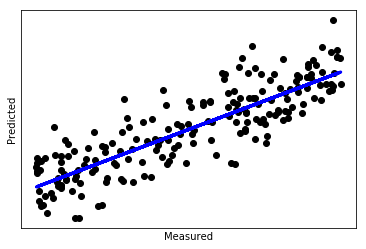

In [4]:
#Author: Prince M. Abudu
import time
start_time = time.time()

import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_noisy_small.csv", header=None)

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
plt.show()
           



Data Descriptions
Dataset shape
(100000, 2)
Training Data shape(X)
(80000, 1)
Test Data shape(X)
(20000, 1)
Training Data shape(Y)
(80000,)
Test Data shape(Y)
(20000,)
Mean squared error: 24.83
Variance score: 0.73
Running time: 0.3295938968658447 seconds 


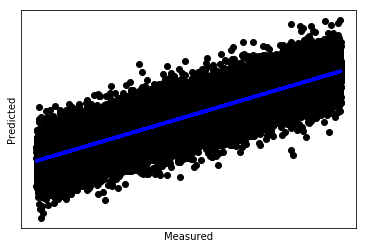

In [8]:
#Author: Prince M. Abudu
import time
start_time = time.time()

import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_noisy_large.csv", header=None)

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Training Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
plt.show()
           

Data Descriptions
Dataset shape
(1000, 2)
Training Data shape(X)
(800, 1)
Test Data shape(X)
(200, 1)
Trainig Data shape(Y)
(800,)
Test Data shape(Y)
(200,)
Mean squared error: 0.00
Variance score: 1.00
Running time: 0.047799110412597656 seconds 


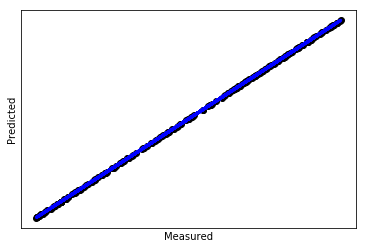

In [6]:
#Author: Prince M. Abudu
import time
start_time = time.time()

import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_perfect_small.csv", header=None)

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
plt.show()
           

Data Descriptions
Dataset shape
(100000, 2)
Training Data shape(X)
(80000, 1)
Test Data shape(X)
(20000, 1)
Trainig Data shape(Y)
(80000,)
Test Data shape(Y)
(20000,)
Mean squared error: 0.00
Variance score: 1.00
Running time: 0.43405795097351074 seconds 


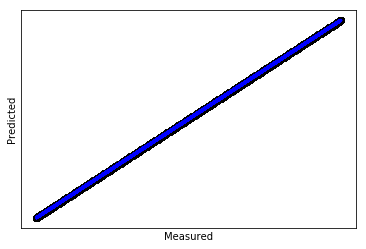

In [42]:
#Author: Prince M. Abudu
import time
start_time = time.time()

import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_perfect_large.csv", header=None)

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
plt.show()
           

#### keras Neural Network

##### Datasets:

  - one_noisy_small (1)
  - one_perfect_small (2)
  - one_noisy_large (3)
  - one_perfect_large (4)
  
The code below provides an implementation of a keras based Neural Network model with 2 neurons, and one hidden layer perfoming regression on 1,000 and 100,000 samples of perfect and noisy data in 100 epochs. 

In [49]:
import time
start_time = time.time()

import numpy
import pandas
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

from keras.wrappers.scikit_learn import BaseWrapper
import copy

def custom_get_params(self, **params):
    res = copy.deepcopy(self.sk_params)
    res.update({'build_fn': self.build_fn})
    return res

BaseWrapper.get_params = custom_get_params

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_perfect_small.csv", 
                            header=None)
dataset = dataframe.values

array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)

#Looking at the data shape 
print(dataframe.shape)
print

#Looking at the data head
print(dataframe.head(5))
print

seed = 7

numpy.random.seed(seed)

# Regression model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#Evaluating model using standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold) 

print ("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

print("Running time: %s seconds " %(time.time() - start_time))



(1000, 2)
       0     1
0  16.28   7.8
1  14.65   7.3
2  95.82  30.0
3  10.00   6.0
4   5.25   4.7
Results: 49.56 (33.14) MSE
Running time: 536.4472646713257 seconds 


In [ ]:
import time
start_time = time.time()

import numpy
import pandas
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

from keras.wrappers.scikit_learn import BaseWrapper
import copy

def custom_get_params(self, **params):
    res = copy.deepcopy(self.sk_params)
    res.update({'build_fn': self.build_fn})
    return res

BaseWrapper.get_params = custom_get_params

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_noisy_small.csv", 
                            header=None)
dataset = dataframe.values

array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)

#Looking at the data shape 
print(dataframe.shape)
print

#Looking at the data head
print(dataframe.head(5))
print

seed = 7

numpy.random.seed(seed)

# Regression model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#Evaluating model using standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold) 

print ("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

print("Running time: %s seconds " %(time.time() - start_time))



(1000, 2)
       0     1
0  16.28   6.4
1  14.65   7.8
2  95.82  28.0
3  10.00   3.9
4   5.25   1.4
Results: 82.57 (37.16) MSE
Running time: 514.9676053524017 seconds 


In [ ]:
import time
start_time = time.time()

import numpy
import pandas
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

from keras.wrappers.scikit_learn import BaseWrapper
import copy

def custom_get_params(self, **params):
    res = copy.deepcopy(self.sk_params)
    res.update({'build_fn': self.build_fn})
    return res

BaseWrapper.get_params = custom_get_params

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_perfect_large.csv", 
                            header=None)
dataset = dataframe.values

array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)

#Looking at the data shape 
print(dataframe.shape)
print

#Looking at the data head
print(dataframe.head(5))
print

seed = 7

numpy.random.seed(seed)

# Regression model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#Evaluating model using standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold) 

print ("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

print("Running time: %s seconds " %(time.time() - start_time))



Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


(100000, 2)
       0     1
0   4.15   4.4
1  72.49  23.5
2  70.24  22.9
3  40.30  14.5
4  29.74  11.5


In [ ]:
import time
start_time = time.time()

import numpy
import pandas
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

from keras.wrappers.scikit_learn import BaseWrapper
import copy

def custom_get_params(self, **params):
    res = copy.deepcopy(self.sk_params)
    res.update({'build_fn': self.build_fn})
    return res

BaseWrapper.get_params = custom_get_params

# load dataset
dataframe = pandas.read_csv("msd_datasets/one_noisy_large.csv", 
                            header=None)
dataset = dataframe.values

array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)

#Looking at the data shape 
print(dataframe.shape)
print

#Looking at the data head
print(dataframe.head(5))
print

seed = 7

numpy.random.seed(seed)

# Regression model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#Evaluating model using standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold) 

print ("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

print("Running time: %s seconds " %(time.time() - start_time))



#### Gaussian Process Regression (LR) 

##### 'perfect data case/no noise' 

##### Datasets:

  - test_gpr_20.csv
  - test_gpr_100.csv
  
The code below provides an implementation of Gaussian Process regression on 20 and 100 samples of perfect data. For 1000 samples, the processor runs out of memory during execution.   

STATS
------------
X shape
(19, 1)
Y shape
(19,)


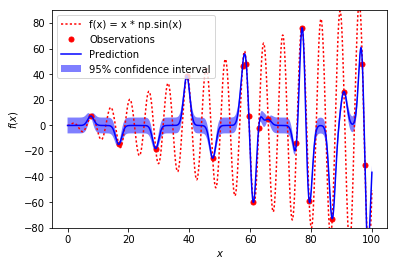

In [6]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_20.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# Observations
y = f(X).ravel()

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
#x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
x = np.atleast_2d(np.linspace(0, 100, 100000)).T

print("STATS")
print("------------")
print 
print("X shape")
print(X.shape) 
print
print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.1, 10)) * RBF(10, (1, 10))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()


STATS
------------
X shape
(49, 1)
Y shape
(49,)


C:\Users\destinatoag\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


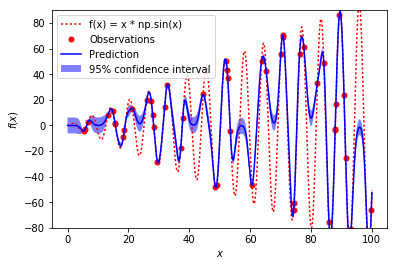

In [20]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_100.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# Observations
y = f(X).ravel()

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
#x = np.atleast_2d(np.linspace(0, 100, 100000)).T

print("STATS")
print("------------")
print 
print("X shape")
print(X.shape) 
print
print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.1, 10)) * RBF(10.0, (1, 10))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()


#### Gaussian Process Regression (LR) 

##### 'noisy data case' 

##### Datasets:

  - test_gpr_20.csv
  - test_gpr_100.csv
  
The code below provides an implementation of Gaussian Process regression on 20 and 100 samples of noisy data. For 1000 samples, the processor runs out of memory during execution.   

Y shape
(19,)


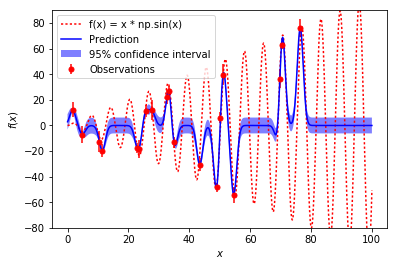

Running time: 0.6050000190734863 seconds 


In [3]:
import time
start_time = time.time()

import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_20.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
#x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
x = np.atleast_2d(np.linspace(0, 100, 100000)).T

# Observations and noise
y = f(X).ravel()

dy = 3.0 + 5.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.1, 10)) * RBF(10, (1, 10))
gp = GaussianProcessRegressor(kernel=kernel, alpha = (dy / y) ** 2, n_restarts_optimizer=10)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()

print("Running time: %s seconds " %(time.time() - start_time))


Y shape
(49,)


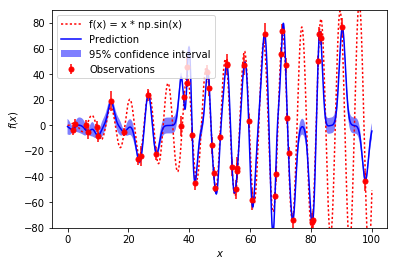

Running time: 0.48000001907348633 seconds 


In [4]:
import time
start_time = time.time()

import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_100.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
#x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
x = np.atleast_2d(np.linspace(0, 100, 10000)).T

# Observations and noise
y = f(X).ravel()

dy = 3.0 + 5.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.1, 10)) * RBF(10, (1, 10))
gp = GaussianProcessRegressor(kernel=kernel, alpha = (dy / y) ** 2, n_restarts_optimizer=10)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()

print("Running time: %s seconds " %(time.time() - start_time))


### Regression Results
____

#### Model: LR
___

Datasets: | one_noisy_small| one_perfect_small| one_noisy_large| one_perfect_large| 

Train/Test Split: |Train: 800 Test: 200 | Train: 800 Test: 200| Train: 80,000 Test: 20,000 | Train: 80,000 Test: 20,000|

MSE: |  25.87  |  0.00  | 24.92   | 0.00

Variance: | 0.68   |  1.00  | 0.72   |  1.00

Running time: |  0.8976  |  0.9149  |  2.9591  | 2.6850
___


#### Model: keras NN
___

Datasets: | one_noisy_small| one_perfect_small| one_noisy_large| one_perfect_large| 

Train/Test Split: |Train: 800 Test: 200 | Train: 800 Test: 200 | Train: 80,000 Test: 20,000 | Train: 80,000 Test: |20,000

MSE: |  82.57  |  49.56  |  ---  | ---

Standard Deviation: |  37.16  | 33.14   |  ---  | ---

Running time: | 514.96   | 536.44   | ---   | ---
___


#### Model: GPR
___

Datasets: | test_gpr_20| test_gpr_100|

Running time: | 0.605 | 0.48   
___

### Analysis

Overall, we notice that the Linear Regression (LR)Models perform well in terms of fitting a straight line through the given datasets for both 'noisy' and 'perfect data.' In fact, the MSE for LR on 'perfect' data is 0.00. We cannot expect anything different from that. As for the keras Neural Network, we can anticipate that the performance increases with increasing number of samples in the dataset. In actuality, the keras NN will do a better job discovering the undelying function for larger datasets compared to simple LR. Without doubt, we see that GPR outperforms simple LR as it smoothly makes predictions on the meshed input space and manages to fit all the data points with a reasonable MSE value which is used to determine the confidence intervals. 

It is nonetheless worth noting that GPR fails to run on datasets larger than 1,000. The processor runs our of memory for any larger sample of data. That reality makes GPR difficult to scale. We also notice that the keras NN requires more computing power when performing regression on large datasets (100,000 or more). Without that, I would not be surprised to see the NN run for a couple of days on a standard CPU.

The next step is to start looking into more on GPR & extrapolation and see how each model performes.

### More on GPR: The effects of input space meshing & kernel parameter values

Y shape
(19,)


C:\Users\destinatoag\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.,  0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


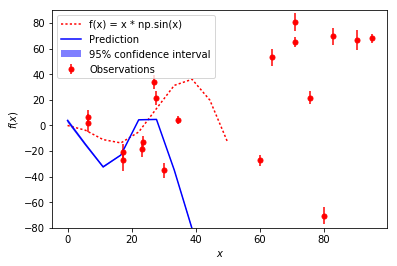

In [16]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_20.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
#x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
x = np.atleast_2d(np.linspace(0, 50, 10)).T

# Observations and noise
y = f(X).ravel()

dy = 3.0 + 5.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.001, 0.01)) * RBF(10, (0.1, 0.01))
gp = GaussianProcessRegressor(kernel=kernel, alpha = (dy / y) ** 2, n_restarts_optimizer=10)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()


Analysis [1]: For a mesh on the input space lower than the number of x-samples, GPR fails to learn the function throughout the observed space of data. The last parameter value in the input space mesh determines the smoothness of the predicted function throughout the data space. 

Y shape
(19,)


C:\Users\destinatoag\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.,  0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


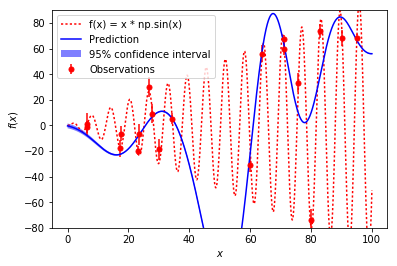

In [17]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_20.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
#x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
x = np.atleast_2d(np.linspace(0, 100, 1000000)).T

# Observations and noise
y = f(X).ravel()

dy = 3.0 + 5.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.001, 0.01)) * RBF(10, (0.1, 0.01))
gp = GaussianProcessRegressor(kernel=kernel, alpha = (dy / y) ** 2, n_restarts_optimizer=10)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()


Analysis [2]: The predicted function is smooth since the third parameter of the input space mesh has a higher value. A lower value wwould make the function jagged. Nonetheless, it can be observed that the prediction of the function is quite terrible as it misses a couple of data points. That is mainly being caused by the kernel parameter values. The values should be a magnitude or more higher to plot a good prediction curve that touches all the data points. 

Y shape
(19,)


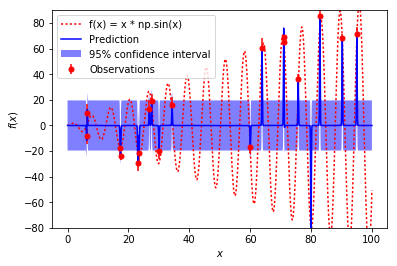

In [18]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("msd_datasets/test_gpr_20.csv", header=None) 

#Splitting the dataset
array = dataframe.values
in_data =  array[:,0:1]
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# The input space is meshed to faciliate evaluations of the real function, the prediction and
# its corresponding MSE
#for test_gpr_100
#x = np.atleast_2d(np.linspace(0, 100, 10000)).T
#for test_gpr_20 
x = np.atleast_2d(np.linspace(0, 100, 1000000)).T

# Observations and noise
y = f(X).ravel()

dy = 3.0 + 5.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

print("Y shape")
print(y.shape) 
print

# Instanciation of a Gaussian Process model with the relevant parameters 
kernel = C(1.0, (0.01, 100)) * RBF(10, (0.1, 10))
gp = GaussianProcessRegressor(kernel=kernel, alpha = (dy / y) ** 2, n_restarts_optimizer=10)

# Fitting to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Predictions on the meshed x values and asking for MSE 
y_pred, sigma = gp.predict(x, return_std=True)


# Function plot showing prediciton and the 95 % confidence interval derived from the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-80, 90)
plt.legend(loc='upper left')

plt.show()


Analysis [3]: Here we can observe that the confidence intervals based on the MSE are too large. That shows that the level of error in the predicted funtion is fairly high. The kernel parameters detemine how best the function mapping x values to y values can be discovered. In this case we notice that the kernel parameters have a wider range. Reducing the magnitude of the parameters results in a better learning of the underlying function. 

### More on GPR: Comparison of GPR Kernels on Periodic and Non-Periodic Data

#### Datasets: 
periodic_gpr_20.csv
test_gpr_20.csv

#### Kernels implemented 
    - Squared Exponential/RBF Kernel 
    - Matern Kernel 
    - Rational Quadratic Kernel
    - Exponential Sine Squared Kernel
    - Constant Kernel 
  

##### Non-Periodic data

[[  0.00000000e+00]
 [  1.00000010e-05]
 [  2.00000020e-05]
 ..., 
 [  9.99999800e+01]
 [  9.99999900e+01]
 [  1.00000000e+02]]
STATS
------------
X shape
(19, 1)
Y shape
(19,)


C:\Users\priudu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


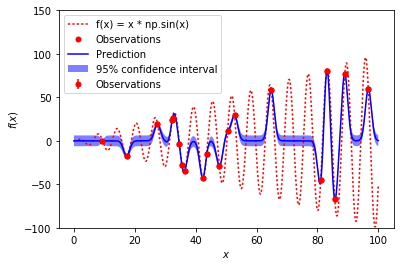

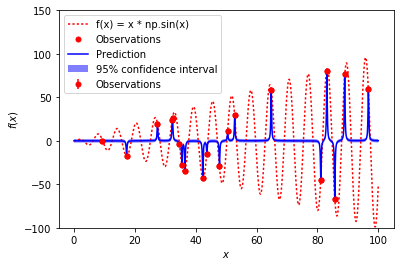

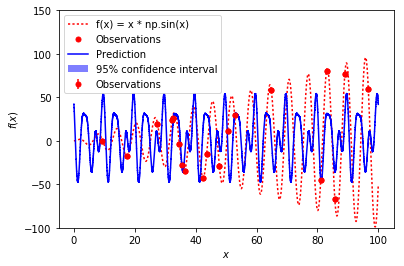

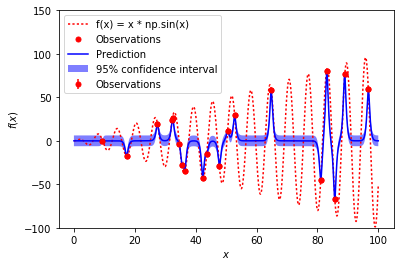

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  3 14:54:45 2017

@author: priudu
"""

import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, ConstantKernel as C, RationalQuadratic, Matern, ExpSineSquared) 

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("//cs.ox.ac.uk/csfs/RedirectedFolders/priudu/Desktop/COLLECTION 48/DPHIL2016/Projects Code/mssd_core_code/msd_datasets/test_gpr_20.csv", header=None) 

array = dataframe.values
in_data =  array[:,0:1]

#Splitting the dataset
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(in_data.all(),100)).T
x = np.atleast_2d(np.linspace(0, 100, 10000000)).T


print (x)


# Observations
y = f(X).ravel()
dy = 1.0 + 0.5 * np.random.random(y.shape)

noise = np.random.normal(0, dy)
y += noise

print("STATS")
print("------------")
print 
print("X shape")
print(X.shape) 
print
print("Y shape")
print(y.shape) 
print


# Instanciate a Gaussian Process models, parameters.....
kernels = [C(1.0, (0.1, 10.0)) * RBF(10, (1, 10)),
          C(1.0, (0.1, 10.0)) * RationalQuadratic(length_scale=0.1, alpha=1.0),
          C(1.0, (0.1, 10.0)) * ExpSineSquared(length_scale=100.0, periodicity=4.5,
                                length_scale_bounds=(10, 100.0),
                                periodicity_bounds=(10.0, 100.0)),
             C(1.0, (0.1, 10.0)) * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for fig_index, kernel in enumerate(kernels):
    gp = GaussianProcessRegressor(kernel=kernel)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    #gp.fit(X.T, y)
    gp.fit(X, y)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)


# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
    fig = plt.figure()
    plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
    plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
    #plt.plot(X.T, y, 'r.', markersize=10, label=u'Observations')
    plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
    plt.plot(x, y_pred, 'b-', label=u'Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-100, 150)
    plt.legend(loc='upper left')

plt.show()



In [ ]:
##### Periodic data

[code will be added here]

#### Kernel analysis: 

The RBF kernel is a fairly good structural regularizer which uses a similarity measure. The kernel has a length scale parameter and also uses bounds for th length scale. The RBF kernel is infinitely differentiable. That means, GPs using the RBF kernel as their covariance function will have a mean square derivation of all orders making them very smooth. 

The Matern kernel is more or less a generalization of the RBF kernel. The difference is that it is parameterized by an additional parameter indicated as nu in the code above. A smaller nu provides a less smooth approximated function. The Matern kernel converges to a RBF kernel as nu goes to infinity. A value of 0.5 for nu results in an absolute exponential kernel. 

The Rational Quadratic kernel is a scale mixture of RBF kernels with a combination of different characteristic length scales parametrized by a length scale parameter and a scale mixture parameter denoted by alpha in the code above. 

The Exponential Sine Squared kernel allows us to model periodic functions. The kernel is parameterized by a length scale parameter and a periodicity parameter.

I multiply the various kernels with the constant kernel. In general, when data has more than one type of feature, multiplying verious kernels enables you to regress across the various datatypes. In my case, I use the constant kernel to scale the magnitudes of the other kernels. 

After implementing the various kernels on the non-periodic data described in the datasets section of this report, we can notice that the implementation using the RBF kernel (plot 1) performs more or less the same as the model implementing the Matern kernel (plot 4). Nonetheless, it can be noticed that the RBF kernel models the undelying function smoother than the Matern kernel. 

The function modeled by the Rational Quadratic kernel (plot 2)has much lower 95% confidence intervals compared to both the RBF and the Matern kernels which have slightly higher 95% confidence intervals. 

The implementation of the Exponential Sine Squared kernel (plot 3) shows that the model does a terrible job when trying to model the function from the data provided. Since the data is not periodic, the kernel fails to succesfully model the underlying function and also does not make good predictions. 

When working to perfom Gaussian process regression on any dataset, the choice of kernel or combinations of kernels hugely affects model perfomance. Moroever, hyperparameter optimization becomes a very important step of developing a functional model. I will move into hyperparameter optimization in the following section. 



### More on GPR: Hyper-parameter Optimization

#### Dataset: 
test_gpr_20.csv

#### Kernels implemented 
    - Squared Exponential/RBF Kernel 
    - Matern Kernel 
    - Rational Quadratic Kernel
    - Exponential Sine Squared Kernel
    - Constant Kernel 
  

#### Hyper-paramter optimization analysis: 

The parameters that describe a machine learning model can be refered to as hyper-parameters. The process of finding the most optimal hyperparameters for a machine learning algorithm is hyperparameter optimization

##### The widely used hyperparameter optimization algorithms are; 

Grid Search
- Employs a brute force search method all possible combinations of hyperparameters

Random Search
- This method entails randomly sampling and evaluating sets of hyperparameters characterized by a probability distribution

Bayesian Hyperparameter Optimization
- Uses a statistical method to select sets of hyperparameters to explore next based on observed performance of previously explored hyperparameter sets

A search for hyper-parameters usually includes a model estimator, parameter space, method for searching and sampling candidates, a cross validation scheme and a score function. 

From the code above, we see that the most optimal parameters are selected for the default RBF kernel using a grid search method. The results also provide grid scores for all the kernels with RBF kernel having the highest scores whereas the Rational Quadratic kernel has the lowest scores.  

[More will be added here: Comparing Grid vs Random Search performance] 

### Extrapolation
_____

#### LR, GPR, kerasNN. 

##### Datasets:

  - one_noisy_small (1)
  - one_perfect_small (2)
  - one_noisy_large (3)
  - one_perfect_large (4)
  - test_gpr_20 (5)
  
The code below gives a basic implementation of extrapolation using LR, GPR and keras regression models on the dasets provided above.

#### Extrapolation with LR

##### noisy data case

Data Descriptions
Dataset shape
(999, 2)
Training Data shape(X)
(799, 1)
Test Data shape(X)
(200, 1)
Trainig Data shape(Y)
(799,)
Test Data shape(Y)
(200,)
Mean squared error: 26.05
Variance score: 0.71
Running time: 0.051000118255615234 seconds 
(798,) (798,)
New Generated inputs = [[ 254.48]
 [ 339.26]
 [ 424.04]
 [ 508.82]
 [ 593.6 ]]
New Generated outputs = [  73.35055777   96.69265363  120.0347495   143.37684536  166.71894122]


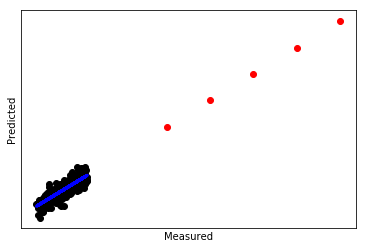

In [13]:
#Author: Prince M. Abudu

import time
start_time = time.time()

from scipy import interpolate
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("//cs.ox.ac.uk/csfs/RedirectedFolders/priudu/Desktop/COLLECTION 48/DPHIL2016/Projects Code/mssd_core_code/msd_datasets/one_noisy_small.csv")

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
    linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
#plt.show()

# Extrapolating Data 

#Sorting data values
x = range(1,799)
ok = X_train
sortedx = np.delete(ok,1)
print(np.shape(x),np.shape(sortedx))

#Function to extrapolate data 
f = interpolate.interp1d(x, sortedx, fill_value = "extrapolate")

#Generating new inputs in the range of 1 to 5
newData=[]
for i in range(1,6):
   
    newData.append(f(i+799))

#Creating an array of new data 
newData=np.array(newData)
newData=[newData]
newData=np.transpose(newData)

#Making predictions 
predictedValues=regr.predict(newData)
ax.scatter(newData, predictedValues, color='red')
print("New Generated inputs =",newData)
print("New Generated outputs =",predictedValues)
plt.show()



Data Descriptions
Dataset shape
(99999, 2)
Training Data shape(X)
(79999, 1)
Test Data shape(X)
(20000, 1)
Trainig Data shape(Y)
(79999,)
Test Data shape(Y)
(20000,)
Mean squared error: 25.24
Variance score: 0.72
Running time: 0.25099992752075195 seconds 
(79998,) (79998,)
New Generated inputs = [[  71.75]
 [  93.87]
 [ 115.99]
 [ 138.11]
 [ 160.23]]
New Generated outputs = [ 23.26616366  29.46314963  35.66013561  41.85712158  48.05410755]


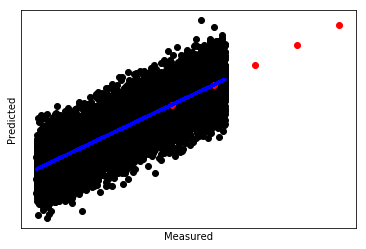

In [12]:
#Author: Prince M. Abudu

import time
start_time = time.time()

from scipy import interpolate
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("//cs.ox.ac.uk/csfs/RedirectedFolders/priudu/Desktop/COLLECTION 48/DPHIL2016/Projects Code/mssd_core_code/msd_datasets/one_noisy_large.csv")

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
#plt.show()

# Extrapolating Data 

#Sorting data values
x = range(1,79999)
ok = X_train
sortedx=np.delete(ok,1)
print(np.shape(x),np.shape(sortedx))

#Function to extrapolate data 
f = interpolate.interp1d(x, sortedx, fill_value = "extrapolate")

#Generating new inputs in the range of 1 to 6
newData=[]
for i in range(1,6):
    newData.append(f(i+79999))

#Creating an array of new data 
newData=np.array(newData)
newData=[newData]
newData=np.transpose(newData)

#Making predictions 
predictedValues=regr.predict(newData)
ax.scatter(newData, predictedValues, color='red')
print("New Generated inputs =",newData)
print("New Generated outputs =",predictedValues)
plt.show()


##### perfect data case

Data Descriptions
Dataset shape
(999, 2)
Training Data shape(X)
(799, 1)
Test Data shape(X)
(200, 1)
Trainig Data shape(Y)
(799,)
Test Data shape(Y)
(200,)
Mean squared error: 0.00
Variance score: 1.00
Running time: 0.21700000762939453 seconds 
(798,) (798,)
New Generated inputs = [[ 254.48]
 [ 339.26]
 [ 424.04]
 [ 508.82]
 [ 593.6 ]]
New Generated outputs = [  74.44543632   98.18022581  121.91501529  145.64980478  169.38459426]


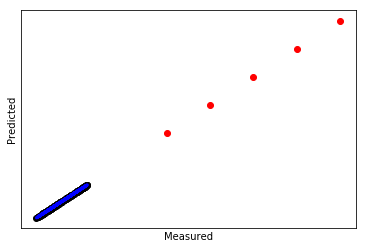

In [11]:
#Author: Prince M. Abudu

import time
start_time = time.time()

from scipy import interpolate
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("//cs.ox.ac.uk/csfs/RedirectedFolders/priudu/Desktop/COLLECTION 48/DPHIL2016/Projects Code/mssd_core_code/msd_datasets/one_perfect_small.csv")

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
#plt.show()

# Extrapolating Data 

#Sorting data values
x = range(1,799)
ok = X_train
sortedx=np.delete(ok,1)
print(np.shape(x),np.shape(sortedx))

#Function to extrapolate data 
f = interpolate.interp1d(x, sortedx, fill_value = "extrapolate")

#Generating new inputs in the range of 1 to 6
newData=[]
for i in range(1,6):
    newData.append(f(i+799))

#Creating an array of new data 
newData=np.array(newData)
newData=[newData]
newData=np.transpose(newData)

#Making predictions 
predictedValues=regr.predict(newData)
ax.scatter(newData, predictedValues, color='red')
print("New Generated inputs =",newData)
print("New Generated outputs =",predictedValues)
plt.show()


Data Descriptions
Dataset shape
(99999, 2)
Training Data shape(X)
(79999, 1)
Test Data shape(X)
(20000, 1)
Trainig Data shape(Y)
(79999,)
Test Data shape(Y)
(20000,)
Mean squared error: 0.00
Variance score: 1.00
Running time: 0.14300012588500977 seconds 
(79998,) (79998,)
71.75
93.87
115.99000000000001
138.10999999999999
160.23
New Generated inputs = [[  71.75]
 [  93.87]
 [ 115.99]
 [ 138.11]
 [ 160.23]]
New Generated outputs = [ 23.29017217  29.483943    35.67771383  41.87148466  48.06525549]


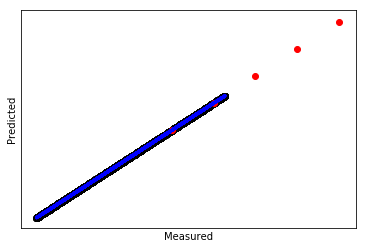

In [8]:
#Author: Prince M. Abudu

import time
start_time = time.time()

from scipy import interpolate
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import model_selection

# load dataset
dataframe = pandas.read_csv("//cs.ox.ac.uk/csfs/RedirectedFolders/priudu/Desktop/COLLECTION 48/DPHIL2016/Projects Code/mssd_core_code/msd_datasets/one_perfect_large.csv")

dataset = dataframe.values

#Splitting out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
#Looking at data shapes

print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
           
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.scatter(X_test, Y_test, color='black')
ax.plot(X_test, regr.predict(X_test), color='blue', 
	linewidth=3)

plt.xticks(())
plt.yticks(())

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print("Running time: %s seconds " %(time.time() - start_time))
#plt.show()

# Extrapolating Data 

#Sorting data values
x = range(1,79999)
ok = X_train
sortedx = np.delete(ok,1)
print(np.shape(x),np.shape(sortedx))

#Function to extrapolate data 
f = interpolate.interp1d(x, sortedx, fill_value = "extrapolate")

#Generating new inputs in the range of 1 to 6
newData = []
for i in range(1,6):
    newData.append(f(i+79999))

#Creating an array of new data 
newData = np.array(newData)
newData = [newData]
newData = np.transpose(newData)

#Making predictions 
predictedValues=regr.predict(newData)
ax.scatter(newData, predictedValues, color='red')
print("New Generated inputs =",newData)
print("New Generated outputs =",predictedValues)
plt.show()


#### Extrapolation with GPR

##### Implementation with test_gpr_20, any other dataset larger than this results in a memory error 

[[  0.00000000e+00]
 [  1.00001000e-03]
 [  2.00002000e-03]
 ..., 
 [  9.99980000e+01]
 [  9.99990000e+01]
 [  1.00000000e+02]]
STATS
------------
X shape
(19, 1)
Y shape
(19,)


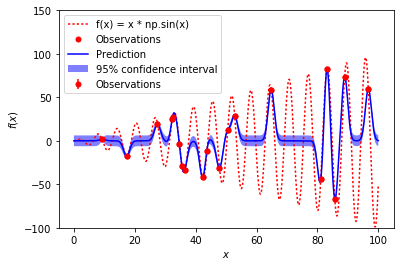

Extrapolated values [[ 207.04]
 [ 196.01]
 [ 184.98]
 [ 173.95]
 [ 162.92]
 [ 151.89]
 [ 140.86]
 [ 129.83]
 [ 118.8 ]]
New Generated outputs = [ -61.41335774  183.19639289   67.75095125 -158.8226435   -70.46762585
  135.24759507   70.35671033 -109.96331048  -66.86497224]
Graph for Extrapolated data


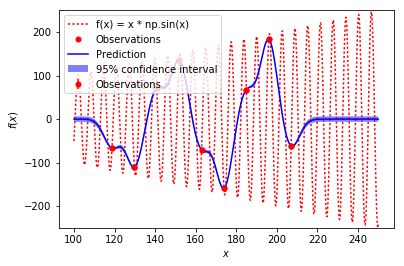

In [16]:
# -*- coding: utf-8 -*-
"""
@author: Prince M. Abudu
"""
from scipy import interpolate
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
	return x * np.sin(x)

# load dataset
dataframe = pandas.read_csv("//cs.ox.ac.uk/csfs/RedirectedFolders/priudu/Desktop/COLLECTION 48/DPHIL2016/Projects Code/mssd_core_code/msd_datasets/test_gpr_20.csv", header=None) 

array = dataframe.values
in_data =  array[:,0:1]

#Splitting the dataset
X = np.atleast_2d(in_data).T

#Reshaping X
X = X.reshape(-1,1)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(in_data.all(),100)).T
x = np.atleast_2d(np.linspace(0, 100, 100000)).T
                 
ok=X             

print (x)

# Observations
y = f(X).ravel()

dy = 1.0 + 0.5 * np.random.random(y.shape)

noise = np.random.normal(0, dy)

y += noise

print("STATS")
print("------------")
print 
print("X shape")
print(X.shape) 
print
print("Y shape")
print(y.shape) 
print


# Instanciate a Gaussian Process model, parameters.....
kernel = C(1.0, (0.1, 10)) * RBF(10, (1, 10))
#kernel = C(1.0, (0.1, 10)) * RationalQuadratic(length_scale=0.1, alpha=1.0)
"""
kernel = C(1.0, (0.1, 10)) * ExpSineSquared(length_scale=100.0, periodicity=4.5,
                                length_scale_bounds=(10, 100.0),
                                periodicity_bounds=(10.0, 100.0))
"""
gp = GaussianProcessRegressor(kernel=kernel, alpha= (dy / y) **2, n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
#gp.fit(X.T, y)
gp.fit(X, y)


# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
#plt.plot(X.T, y, 'r.', markersize=10, label=u'Observations')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-100, 150)
plt.legend(loc='upper left')

plt.show()


#Extrapolation

#generating new input values 
x1 = range(1,19)
ok = X
sortedx=np.delete(ok,1)

#Extrapolation function 
f1 = interpolate.interp1d(x1, sortedx, fill_value = "extrapolate")        

#generating new x input values in the range of 1 to 10
newData=[]
for i in range(1,10):
    newData.append(f1(i-10))
newData=np.array(newData)


newData=[newData]

newData=np.transpose(newData)

print ("Extrapolated values",newData)

y1=f(newData).ravel()

kernel2 = C(1.0, (0.1, 10)) * RBF(10, (1, 10))
n = np.atleast_2d(np.linspace(100, 250, 100000)).T
                 
dy1 = 1.0 + 0.5 * np.random.random(y1.shape)
gp1 = GaussianProcessRegressor(kernel=kernel2, alpha= (dy1 / y1) **2, n_restarts_optimizer=10)
noise1 = np.random.normal(0, dy1)
y1 += noise1
gp1.fit(newData,y1)

y_pred1, sigma1 = gp1.predict(n, return_std=True)

print("New Generated outputs =", y1)
print("Graph for Extrapolated data")


fig1 = plt.figure()
plt.plot(n, f(n), 'r:', label=u'f(x) = x * np.sin(x)')
plt.errorbar(newData.ravel(), y1, dy1, fmt='r.', markersize=10, label=u'Observations')
plt.plot(newData, y1, 'r.', markersize=10, label=u'Observations')
plt.plot(n, y_pred1, 'b-', label=u'Prediction')
plt.fill(np.concatenate([n, n[::-1]]),
         np.concatenate([y_pred1 - 1.9600 * sigma1,
                        (y_pred1 + 1.9600 * sigma1)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-250, 250)
plt.legend(loc='upper left')


plt.show()


#### Extrapolation with kerasNN

In [ ]:

import time
start_time = time.time()

import numpy
import pandas
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import BaseWrapper
from scipy import interpolate
import copy

def custom_get_params(self, **params):
    res = copy.deepcopy(self.sk_params)
    res.update({'build_fn': self.build_fn})
    return res

BaseWrapper.get_params = custom_get_params

# load dataset
dataframe = pandas.read_csv("one_noisy_small.csv", header=None)
dataset = dataframe.values

array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train,  Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
'''
#Looking at the data shape 
print(dataframe.shape)
print

#Looking at the data head
print(dataframe.head(5))
print
'''
print("Data Descriptions")
print
print("Dataset shape")
print(dataframe.shape) 
print
print("Training Data shape(X)")
print(X_train.shape)
print("Test Data shape(X)")
print(X_test.shape) 
print
print("Trainig Data shape(Y)")
print(Y_train.shape)
print("Test Data shape(Y)")
print(Y_test.shape) 
print

seed = 7

numpy.random.seed(seed)

# Regression model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(1, input_dim=1, init='normal', activation='relu'))
	model.add(Dense(1, init='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

#Evaluating model using standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_test, Y_test, cv=kfold) 

#Extrapolation

#Generating x new input values 
x1=range(1,800)
ok = X_train
sortedx = numpy.delete(ok,1)


f1 = interpolate.interp1d(x1, sortedx, fill_value = "extrapolate")


#generating new inputs in the range of 1 to 10
newData = []
for i in range(1,10):
        newData.append(f1(i+800))
     

newData = numpy.array(newData)
newData = [newData]
newData = numpy.transpose(newData)

predictedValues = estimator.predict(newData)

print("New Generated inputs =",newData)
print("New Generated outputs =",predictedValues)

print ("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

print("Running time: %s seconds " %(time.time() - start_time))

#tensorflow & keras' attribute requirements need to be satisfied to run this.


#### Extrapolation Analysis 

The implentations above show data being extrapolated beyond the range of the input samples. Major predcition challenges occur when a model is overfit or underfit. An overfit model has poor predictive perfomance as it attempts to describe random error or noise instead of the undelying relationship in the data. Underfitting may occur when a model fails to capture the undelying trend within data for instance, usage of a linear model on non-linear data. Therefore, it is important for any model to 'generalize' with the data given as 'memorizing' may cause the model to perform worse on 'unseen' data. For linear data, it can be noted that the error increases significantly as you move away from the average of the x values. The GPR model seems to extrapolate data very well for the given function. Since Neural Networks are consistent with training data, outside the training set, the keras Neural Network model's extrapolation behaviour is random and therefore not a great method for generalizing over a dataset. 